In [2]:
import numpy as np
import pandas as pd
from scipy.stats import multinomial

from datetime import datetime, timedelta
from scipy import stats

from numpy import random
import datetime
from random import randint

from ssrm_test import ssrm_test
import matplotlib.pyplot as plt

In [3]:
file_path = r'C:\Users\General\Documents\GitHub\tw-experimentation\data\test_data.csv'

# Read the CSV file into a pandas DataFrame
a = pd.read_csv(file_path)
a

,T,conversion,revenue,pre_exp_revenue,num_actions,trigger_dates,currency,country_of_origin,segment_1,segment_2,segment_3
0,1,0,0.000000,1259.336092,0,2022-01-01 00:16:00,EUR,US,New,Active,10- transfers
1,0,0,0.000000,184.145856,0,2022-01-02 19:02:00,USD,UK,Old,Rare,10- transfers
2,0,0,0.000000,461.242410,0,2022-01-12 10:55:00,EUR,USD,Old,Usual,10+ transfers
3,1,0,0.000000,215.445976,0,2022-01-05 18:20:00,USD,USD,New,Active,10- transfers
4,1,0,0.000000,214.730544,0,2022-01-15 23:38:00,EUR,UK,New,Rare,10- transfers
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,3346.579443,55.610261,9,2022-01-08 09:24:00,EUR,US,New,Active,10- transfers
9996,0,0,0.000000,627.234803,0,2022-01-04 03:10:00,USD,US,Old,Usual,10- transfers
9997,1,1,531.085381,179.223464,11,2022-01-05 09:11:00,GBP,UK,New,Usual,10+ transfers
9998,0,1,919.237492,1080.817780,9,2022-01-16 10:51:00,GBP,UK,New,Active,10+ transfers


In [11]:
# a['T'].unique()
# value_count = a['T'].value_counts().reset_index()
# value_count['prob'] = value_count['count'] / sum(value_count['count'])
# value_count

In [6]:
df = a['T'].apply(lambda x: [1, 0, 0] if x == 0 else [0, 1, 0] if x == 1 else [0, 0, 1])
df1 = np.array(df.to_list())
df1

array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

## Frequentist Analysis
To obtain sequential p-values, simply import the `sequential_p_values` function. The probability under the null hypothesis that the sequential p-value falls below $\alpha$ is less than $\alpha$. In other words, if you reject the null and declare an SRM to be present when the sequential p-value is less than $\alpha$, then the probability of reporting a **false positive** is at most $\alpha$. 

In [7]:
from ssrm_test import ssrm_test
import matplotlib.pyplot as plt

p_0 = [1/3, 1/3, 1/3]
pvals = ssrm_test.sequential_p_values(df1, p_0)

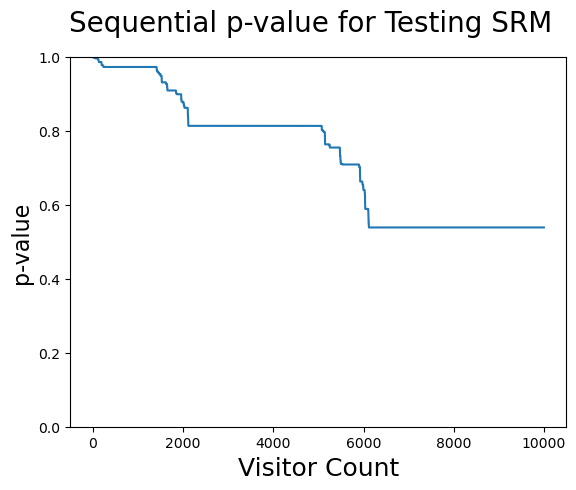

In [8]:
fig = plt.figure()
plt.plot(pvals)
fig.suptitle("Sequential p-value for Testing SRM", fontsize=20)
plt.xlabel("Visitor Count", fontsize=18)
plt.ylabel("p-value", fontsize=16)
plt.ylim(0, 1)
plt.show()

We can reject the null hypothesis at around a visitor count of 6000

## Bayesian Analysis
One can obtain posterior probabilities (of an SRM) in the following way

In [9]:
posterior_probabilities = ssrm_test.sequential_posterior_probabilities(df1, p_0)

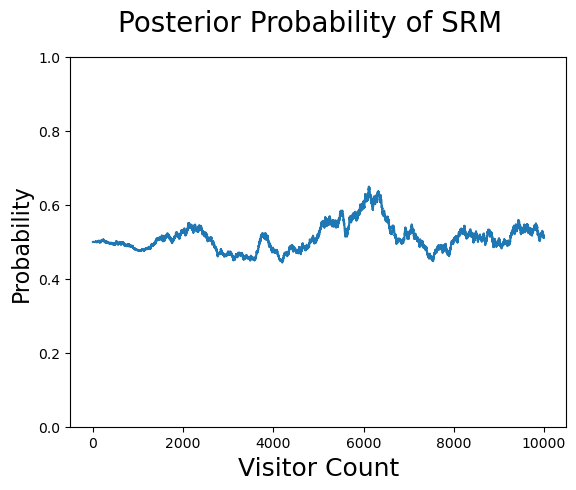

In [10]:
fig = plt.figure()
plt.plot(posterior_probabilities)
fig.suptitle("Posterior Probability of SRM", fontsize=20)
plt.xlabel("Visitor Count", fontsize=18)
plt.ylabel("Probability", fontsize=16)
plt.ylim(0, 1)
plt.show()

In [13]:
file_path2 = r'C:\Users\General\Desktop\CAPSTONE\Datasets'
# C:\Users\General\Desktop\MSc Data Science\CAPSTONE\Datasets

a_1 = pd.read_csv(file_path2 + '\\test1.csv')
a_2 = pd.read_csv(file_path2 + '\\test2.csv')
a_3 = pd.read_csv(file_path2 + '\\test3.csv')

In [20]:
a_1['VARIANT'].unique()

array([0, 1, 2], dtype=int64)

In [24]:
df_1 = a_1['VARIANT'].apply(lambda x: [1, 0, 0] if x == 0 else [0, 1, 0] if x == 1 else [0, 0, 1])
df_a = np.array(df_1.to_list())
df_a

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [25]:
from ssrm_test import ssrm_test
import matplotlib.pyplot as plt

p_01 = [1/3, 1/3, 1/3]
pvals1 = ssrm_test.sequential_p_values(df_a, p_01)

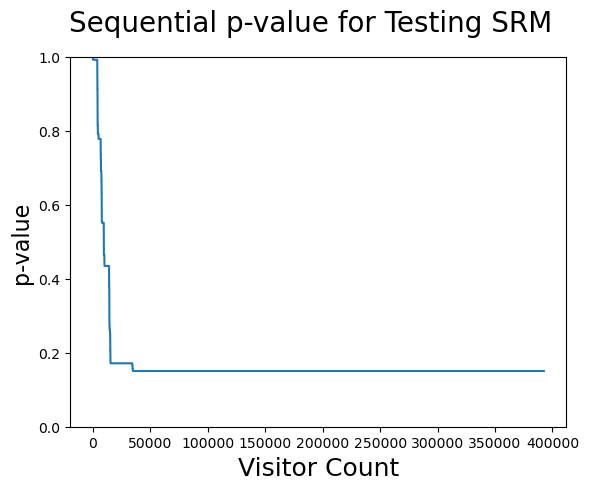

In [26]:
fig = plt.figure()
plt.plot(pvals1)
fig.suptitle("Sequential p-value for Testing SRM", fontsize=20)
plt.xlabel("Visitor Count", fontsize=18)
plt.ylabel("p-value", fontsize=16)
plt.ylim(0, 1)
plt.show()

## Bayesian Analysis
One can obtain posterior probabilities (of an SRM) in the following way

In [27]:
posterior_probabilities1 = ssrm_test.sequential_posterior_probabilities(df_a, p_01)

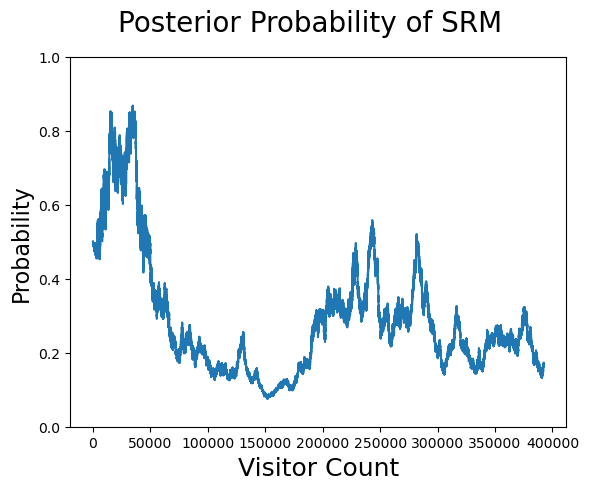

In [28]:
fig = plt.figure()
plt.plot(posterior_probabilities1)
fig.suptitle("Posterior Probability of SRM", fontsize=20)
plt.xlabel("Visitor Count", fontsize=18)
plt.ylabel("Probability", fontsize=16)
plt.ylim(0, 1)
plt.show()

In [18]:
a_2['VARIANT'].unique()

array([1, 0], dtype=int64)

In [29]:
df_2 = a_2['VARIANT'].apply(lambda x: [1, 0] if x == 0 else [0, 1])
df_b = np.array(df_2.to_list())
df_b

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]])

In [30]:
from ssrm_test import ssrm_test
import matplotlib.pyplot as plt

p_02 = [1/2, 1/2]
pvals2 = ssrm_test.sequential_p_values(df_b, p_02)

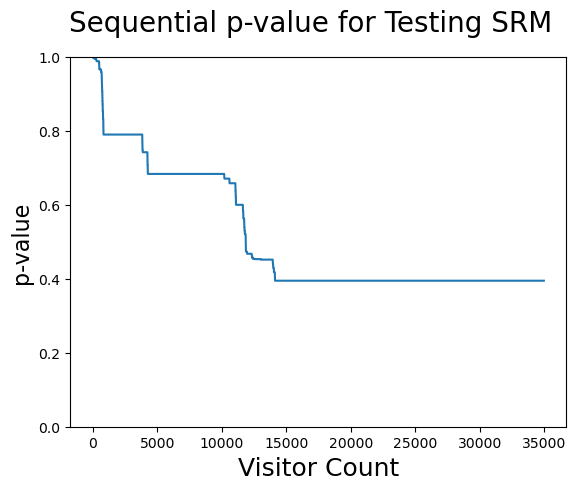

In [31]:
fig = plt.figure()
plt.plot(pvals2)
fig.suptitle("Sequential p-value for Testing SRM", fontsize=20)
plt.xlabel("Visitor Count", fontsize=18)
plt.ylabel("p-value", fontsize=16)
plt.ylim(0, 1)
plt.show()

## Bayesian Analysis
One can obtain posterior probabilities (of an SRM) in the following way

In [32]:
posterior_probabilities2 = ssrm_test.sequential_posterior_probabilities(df_b, p_02)

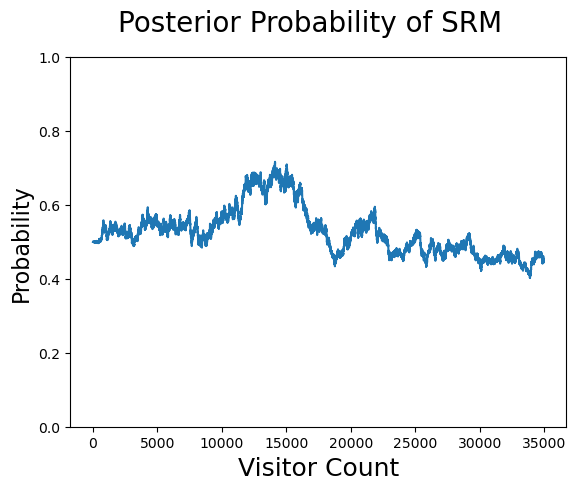

In [33]:
fig = plt.figure()
plt.plot(posterior_probabilities2)
fig.suptitle("Posterior Probability of SRM", fontsize=20)
plt.xlabel("Visitor Count", fontsize=18)
plt.ylabel("Probability", fontsize=16)
plt.ylim(0, 1)
plt.show()

In [19]:
a_3['VARIANT'].unique()

array([0, 1], dtype=int64)

In [34]:
df_3 = a_3['VARIANT'].apply(lambda x: [1, 0] if x == 0 else [0, 1])
df_c = np.array(df_3.to_list())
df_c

array([[1, 0],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]])

In [35]:
from ssrm_test import ssrm_test
import matplotlib.pyplot as plt

p_03 = [1/2, 1/2]
pvals3 = ssrm_test.sequential_p_values(df_c, p_03)

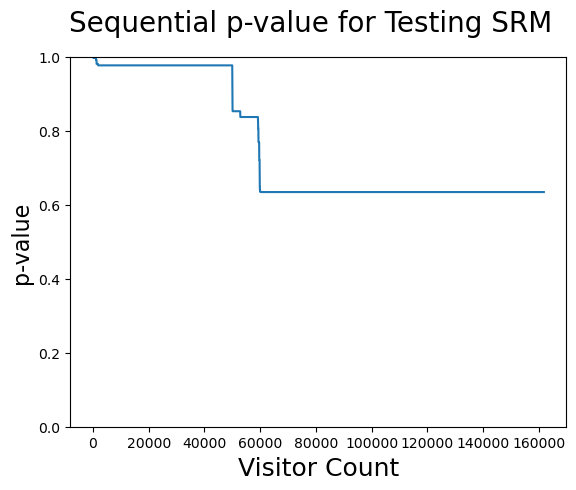

In [36]:
fig = plt.figure()
plt.plot(pvals3)
fig.suptitle("Sequential p-value for Testing SRM", fontsize=20)
plt.xlabel("Visitor Count", fontsize=18)
plt.ylabel("p-value", fontsize=16)
plt.ylim(0, 1)
plt.show()

## Bayesian Analysis
One can obtain posterior probabilities (of an SRM) in the following way

In [37]:
posterior_probabilities3 = ssrm_test.sequential_posterior_probabilities(df_c, p_03)

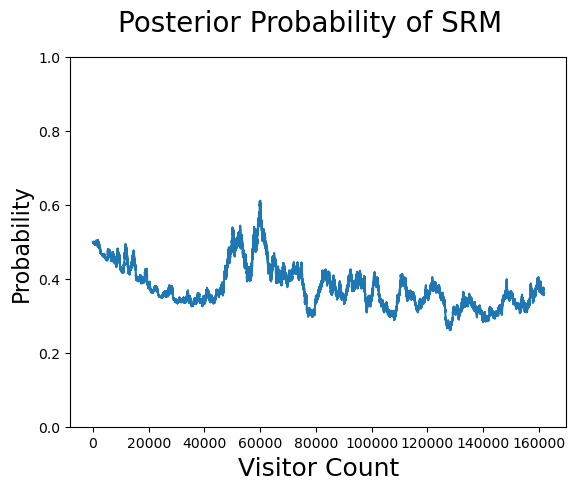

In [38]:
fig = plt.figure()
plt.plot(posterior_probabilities3)
fig.suptitle("Posterior Probability of SRM", fontsize=20)
plt.xlabel("Visitor Count", fontsize=18)
plt.ylabel("Probability", fontsize=16)
plt.ylim(0, 1)
plt.show()